In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

In [2]:
'''DATA PRE-PROCESS'''


df = pd.read_csv("WineQT.csv")
#drop the un-related row that marked the id of the wine
dfy = df['quality']
#drop the un-related and target rows
dfX = df.drop(columns = ["Id","quality"])

oversampler = RandomOverSampler(random_state = 42,sampling_strategy = {3:350,4:370,7:420})

def max_abs_scale(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

#normalize the data based on the maximum absolute value scaling
dfX = max_abs_scale(dfX)

X_resampled, y_resampled = oversampler.fit_resample(dfX, dfy)

#convert pandas dataframe to numpy array
X = X_resampled.to_numpy()
y = y_resampled.to_numpy()

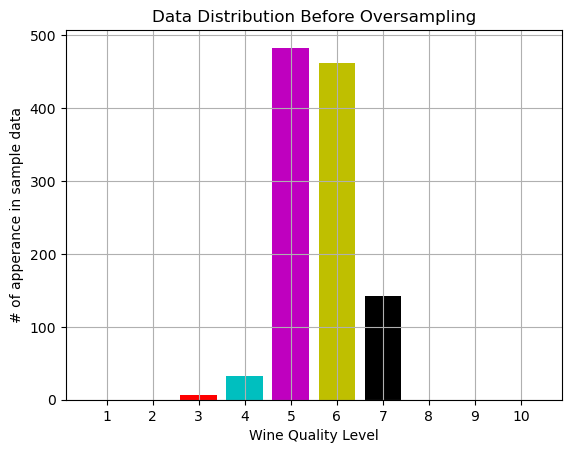

In [11]:
#bar diagram of sample distribution before resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in dfy.to_numpy():
        if j == i:
            count += 1
    y_axis.append(count)
    
colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

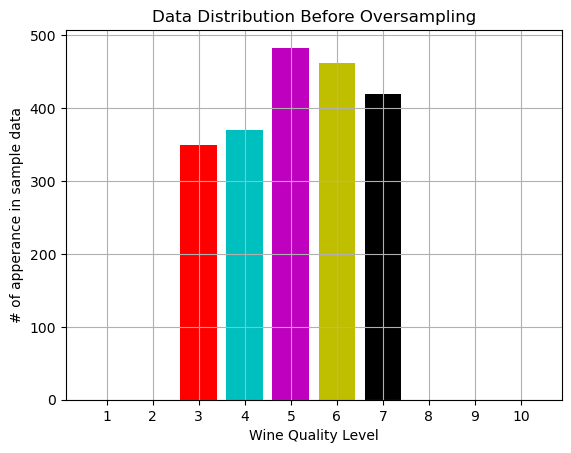

In [12]:
#bar diagram of sample distribution after resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in y:
        if j == i:
            count += 1
    y_axis.append(count)

colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

In [13]:
#split training, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

In [35]:
def logis(X, y, deg = 1, penalty = 'none', alpha = 1.0,solver = 'lbfgs',max_iter = 4500):
    model = LogisticRegression(max_iter=max_iter,penalty = penalty, C = alpha, solver = solver)
    poly = PolynomialFeatures(degree = deg)
    X_train_transformed = poly.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    
    
    
    #validation scores
    X_trans = poly.fit_transform(X)
    y_pred = model.predict(X_trans)
    recall = recall_score(y,y_pred, average='macro')
    f1 = f1_score(y,y_pred,average='macro')
    accuracy = accuracy_score(y,y_pred)
    precision = precision_score(y,y_pred,average='macro')
    print('recall: ',recall)
    print('f1',f1)
    print('accuracy:',accuracy)
    print('precision',precision)
    
    
    y_pred_train = model.predict(X_train_transformed)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    print('train_accuracy',train_accuracy)
    return accuracy, [model.intercept_], [model.coef_], train_accuracy


In [10]:
print("-Training Score")
train_accuracy,inter, coef,train_accuracy = logis(X_train,y_train)
print("-Validation Score")
val_accuracy, inter, coef, train_accuracy = logis(X_val,y_val)

-Training Score


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.4981934767886416
f1 0.4914555187894412
accuracy: 0.5875550660792952
precision 0.4870762173327246
-Validation Score
recall:  0.47656063761385464
f1 0.4728489409666003
accuracy: 0.5693430656934306
precision 0.4770670754366407


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
degree_train = []
degree_val = []



for i in range(2, 8):
    print('----------')
    print("*Polynomial of Degree:",i)
    print("-Validation Result:")
    val_accuracy, inter, coef, train_accuracy = logis(X_val,y_val,deg = i)
    degree_train.append(train_accuracy)
    degree_val.append(val_accuracy)
    
# The best degree = 7

----------
*Polynomial of Degree: 2
-Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.5760023225218472
f1 0.5526785316026585
accuracy: 0.6642335766423357
precision 0.5405479632930613
train_accuracy 0.7505506607929515
----------
*Polynomial of Degree: 3
-Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


recall:  0.603798352185449
f1 0.5738660144496309
accuracy: 0.6788321167883211
precision 0.5621782339524275
train_accuracy 0.8182819383259912
----------
*Polynomial of Degree: 4
-Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.6335986594051111
f1 0.607127947599733
accuracy: 0.7226277372262774
precision 0.5968253968253968
train_accuracy 0.8573788546255506
----------
*Polynomial of Degree: 5
-Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.6453218824186567
f1 0.6171296296296296
accuracy: 0.7372262773722628
precision 0.6060838166101324
train_accuracy 0.861784140969163
----------
*Polynomial of Degree: 6
-Validation Result:


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


recall:  0.6456849602010893
f1 0.6288591038591038
accuracy: 0.7445255474452555
precision 0.625100125100125
train_accuracy 0.8755506607929515
----------
*Polynomial of Degree: 7
-Validation Result:
recall:  0.655460131266583
f1 0.6281011006381034
accuracy: 0.7518248175182481
precision 0.6252980280431261
train_accuracy 0.8948237885462555


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
degrees = [str(i) for i in range(2,8)]
plt.scatter(degrees,degree_val,color='r',label='validation',)
plt.scatter(degrees,degree_train,color='b',label='training',)
plt.legend()
plt.title('(polynomial transformation) degree vs. accuracy')
plt.xlabel('acitvation')
plt.ylabel('accuracy')

In [33]:
# ridge regularization
accuracy_train_l2 = []
accuracy_val_l2 = []
coefs_l2 = [] #all weights
inters_l2 = [] #all w0
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,40,60,100]
for a in alpha_s:
    print('---------')
    print('a = ', a)
    val_accuracy, inter, coef , train_accuracy= logis(X_val, y_val, penalty = 'l2', deg = 7,alpha = a)
    accuracy_val_l2.append(val_accuracy)
    accuracy_train_l2.append(train_accuracy)
    coefs_l2.append(coef)
    inters_l2.append(inter)

---------
a =  0.0001


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.2794820122406329
f1 0.21234648644720586
accuracy: 0.35766423357664234
precision 0.304029304029304
train_accuracy 0.3683920704845815
---------
a =  0.0005


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.3038824561656948
f1 0.25450350579961745
accuracy: 0.3722627737226277
precision 0.4128813499612485
train_accuracy 0.42015418502202645
---------
a =  0.001


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.3653542669496068
f1 0.32910038716490325
accuracy: 0.4306569343065693
precision 0.39990981240981244
train_accuracy 0.4746696035242291
---------
a =  0.005


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.4205905222151343
f1 0.39599810113747397
accuracy: 0.49635036496350365
precision 0.4260829837274345
train_accuracy 0.545704845814978
---------
a =  0.01


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.4212049615392511
f1 0.40015928828165115
accuracy: 0.49635036496350365
precision 0.43238973992900137
train_accuracy 0.558920704845815
---------
a =  0.05


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.4875319809281522
f1 0.47307259121368866
accuracy: 0.5766423357664233
precision 0.4792506105006105
train_accuracy 0.6134361233480177
---------
a =  0.1


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.4963039107527136
f1 0.48010950976789485
accuracy: 0.583941605839416
precision 0.4901777235110569
train_accuracy 0.6183920704845814
---------
a =  1


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.5731399613403009
f1 0.5614941960209513
accuracy: 0.6788321167883211
precision 0.5563851154883763
train_accuracy 0.683920704845815
---------
a =  5


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.5630017124923746
f1 0.5523224865554645
accuracy: 0.6642335766423357
precision 0.5475806451612902
train_accuracy 0.7175110132158591
---------
a =  10


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.5940794067279637
f1 0.5805378831694621
accuracy: 0.6934306569343066
precision 0.5761669107374304
train_accuracy 0.7455947136563876
---------
a =  40


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.6168066794552364
f1 0.5983607818313993
accuracy: 0.7153284671532847
precision 0.5920085470085469
train_accuracy 0.7874449339207048
---------
a =  60


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


recall:  0.6120447746933316
f1 0.5924566182337025
accuracy: 0.708029197080292
precision 0.5858771929824561
train_accuracy 0.7929515418502202
---------
a =  100
recall:  0.6072828699314269
f1 0.5865920363417235
accuracy: 0.7007299270072993
precision 0.579996534996535
train_accuracy 0.808920704845815


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


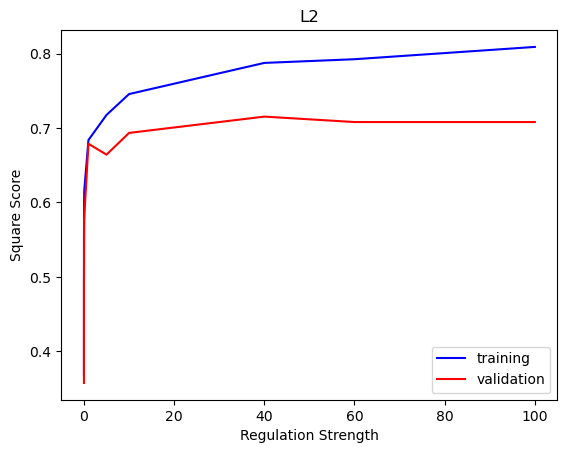

In [16]:
#plot the change in validation and training score with respect to different regulation strength
# L2 regularization
plt.plot( alpha_s,accuracy_train_l2, label = "training",color ='b')
plt.plot(alpha_s,accuracy_val_l2, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.legend()
plt.title("L2")
plt.show()

In [18]:
 #put all the w1 in a list, all the w2 in a list, etc.
# L2
all_w_l2 = []
for j in range(len(coefs_l2[0][0])):
    all_w_j = []
    for i in range(len(coefs_l2)):
        all_w_j.append(coefs_l2[i][0][j])
    all_w_l2.append(all_w_j)



IndexError: list index out of range

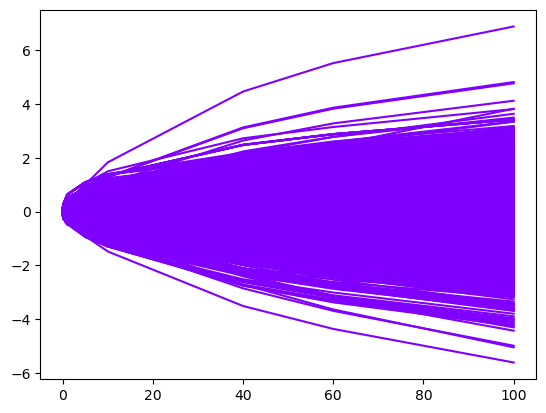

In [22]:
# drawing for L2 weights change
color = iter(cm.rainbow(np.linspace(0, 1, 20000)))
for w in range(20):
        c = next(color)
        label_value = 'w_'+''+str(w)
        #plot the change in feature weights with respect to different regulation strength
        plt.plot(alpha_s,all_w_l2[w], label = label_value,c=c)
plt.legend()
plt.xlabel("Regulation Strength")
plt.ylabel("accuracy")
plt.title("weights vs. regularization strength [L2]")
plt.show()

In [38]:
#final Result
test_accuracy, inter, coef , train_accuracy= logis(X_test, y_test, deg = 7,max_iter = 10000)

recall:  0.7085064693760347
f1 0.7046945259711217
accuracy: 0.8243243243243243
precision 0.7019211917309743
train_accuracy 0.9570484581497798


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
#Final score
print('The accuracy of logisitic model on the test set is', test_accuracy)

The accuracy of logisitic model on the test set is 0.8243243243243243
